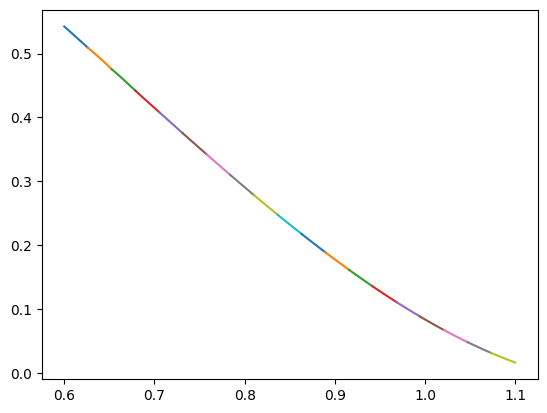

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

interval = [0.6, 1.1]

# Function and its derivative
def func(x):
    return 0.5 * x ** 2 + np.cos(2 * x)

def f_deriv_func(x):
    return x - 2 * np.sin(2 * x)

def s_deriv_func(x):
    return 1 - 4 * np.cos(2 * x)


def build_spline():
    c_coefficient_matrix = [0] + [h_values[i] / (h_values[i] + h_values[i + 1]) for i in range(0, n - 1)] + [0]
    a_coefficient_matrix = [0] + [h_values[i + 1] / (h_values[i] + h_values[i + 1]) for i in range(0, n - 1)] + [0]
    b_coefficient_matrix = [1] + [2] * (n - 1) + [1]

    rhs = [s_deriv_func(interval[0])] + [
        6 / (h_values[i] + h_values[i + 1]) * ((y_values[i + 1] - y_values[i]) / h_values[i + 1] \
                                               - (y_values[i] - y_values[i - 1]) / h_values[i]) for i in
        range(0, n - 1)] + [s_deriv_func(interval[1])]

    alpha = [-c_coefficient_matrix[0] / b_coefficient_matrix[0]]
    betta = [rhs[0] / b_coefficient_matrix[0]]

    moments = [s_deriv_func(interval[1])]

    for i in range(0, n - 1):
        alpha.append(-c_coefficient_matrix[i] / (alpha[i] * a_coefficient_matrix[i] + b_coefficient_matrix[i]))
        betta.append((rhs[i] - betta[i] * a_coefficient_matrix[i]) / (
                    alpha[i] * a_coefficient_matrix[i] + b_coefficient_matrix[i]))

    for i in range(0, n - 1):
        moments.append(alpha[n - i - 1] * moments[i] + betta[n - i - 1])
    moments.append(s_deriv_func(interval[0]));
    moments = moments[::-1]

    a = moments[:-1:]
    b = [(moments[i + 1] - moments[i]) / h_values[i + 1] for i in range(0, n)]
    c = [(y_values[i + 1] - y_values[i]) / h_values[i + 1] - h_values[i + 1] / 6 * (2 * moments[i] + moments[i + 1]) for
         i in
         range(0, n)]

    return [a, b, c]



def evaluate_spline(x, i):
    return y_values[i] + spline_coefficients[2][i] * (x - x_values[i]) + spline_coefficients[0][i] * (
            x - x_values[i]) ** 2 / 2 + spline_coefficients[1][i] * (x - x_values[i]) ** 3 / 6


x_values = np.linspace(*interval, 20)
n = len(x_values) - 1
h_values = [abs(x_values[_] - x_values[_ - 1]) for _ in range(0, n + 1)]
y_values = [func(_) for _ in x_values]

spline_coefficients = build_spline()

for i in range(n):
    xl = np.linspace(x_values[i], x_values[i + 1], 10)
    yl = evaluate_spline(xl, i)

    plt.plot(xl, yl)




In [22]:
def norm(lst):
    return max(list(map(np.fabs, lst)))


ns = [3, 5, 10, 20, 30, 40, 55, 70, 85, 100]
max_deviations = []
relative_deviations = []

print("=" * 56)

for num_intervals in ns:

    spline_y_values = []
    x_values = np.linspace(*interval, num_intervals)
    n = num_intervals - 1
    h_values = [abs(x_values[_] - x_values[_ - 1]) for _ in range(0, n + 1)]
    y_values = [func(_) for _ in x_values]

    spline_coefficients = build_spline()

    for i in range(n):
        xl = np.linspace(x_values[i], x_values[i + 1], 10)
        yl = evaluate_spline(xl, i)

        spline_y_values += [*yl]

    original_y_values = func(np.linspace(*interval, n * 10))

    spline_norm = norm(np.array(spline_y_values) - original_y_values)
    func_norm = norm(original_y_values)

    max_deviations.append(spline_norm)
    relative_deviations.append(spline_norm / func_norm * 100)

    print(num_intervals, spline_norm, spline_norm / func_norm * 100, sep='\t')


3	0.016985877122662363	3.1318584425979497
5	0.016335519228396822	3.0119453614448877
10	0.006378458737707482	1.1760611303257056
20	0.003190435108451628	0.5882528796016038
30	0.0021222053521311457	0.391292525019557
40	0.0015892847859142467	0.29303255513471244
55	0.0011542377827220562	0.21281852673717036
70	0.0009061208573131196	0.16707069269940555
85	0.0007457830781705255	0.13750759014963085
100	0.0006336501951748064	0.11683251321560283


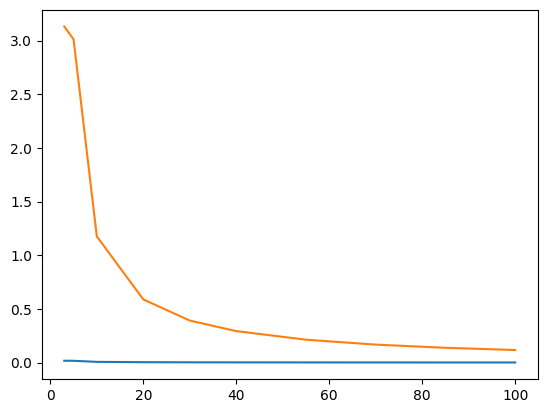

In [23]:
plt.plot(ns, max_deviations)
plt.plot(ns, relative_deviations)